<a href="https://colab.research.google.com/github/Abhish777/Image-Augmentation-and-Segmentation/blob/master/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q watermark

In [ ]:
%load_ext watermark

%watermark -v -p cv2

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

cv2: 4.1.2



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from google.colab.patches import cv2_imshow

%matplotlib inline

sns.set_style("white")
rcParams['figure.figsize'] = 12, 10


Shape: (507, 396, 3)
Data type: uint8
RGB Color Space


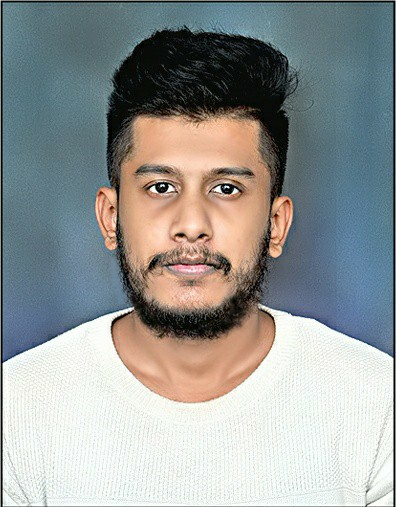

In [ ]:
img = cv2.imread(filename = '/content/Abhish_ijari.jpg', flags = cv2.IMREAD_COLOR)
print('Shape:', img.shape)
print('Data type:', img.dtype)
print('RGB Color Space')
cv2_imshow(img)

In [ ]:
h, w, channels = img.shape

print(f'height: {h}, width: {w}, color channels: {channels}')

height: 507, width: 396, color channels: 3


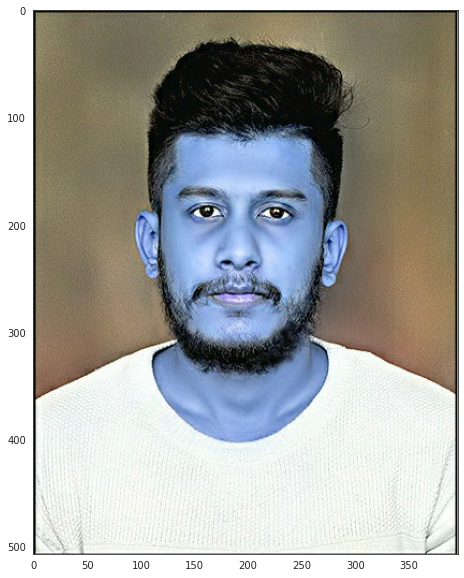

In [ ]:
plt.imshow(img);

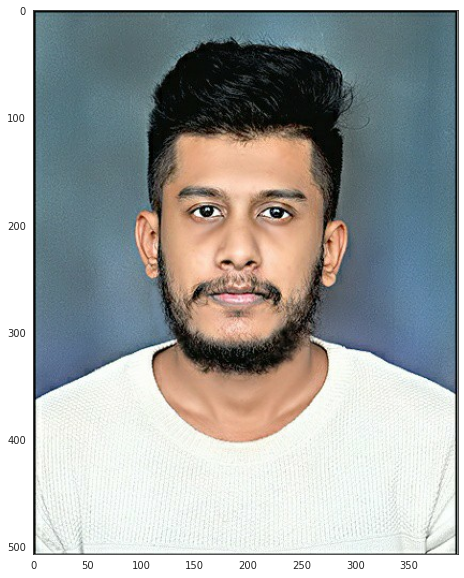

In [ ]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

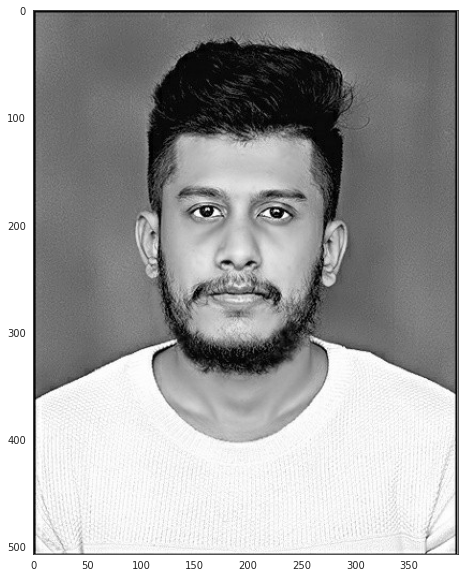

In [ ]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

In [ ]:
cv2.imwrite('abhish-gray.jpg', cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY))

True

In [ ]:
def show_image(image, show_axis=True):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if not show_axis:
    plt.axis('off');

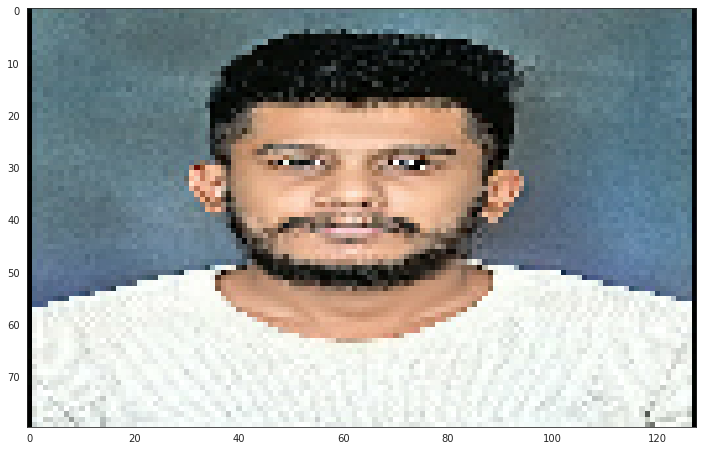

In [ ]:
resize_width, resize_height = 128, 80

resized = cv2.resize(
  src = img, 
  dsize=(resize_width, resize_height), 
  interpolation=cv2.INTER_LANCZOS4
)

show_image(resized)

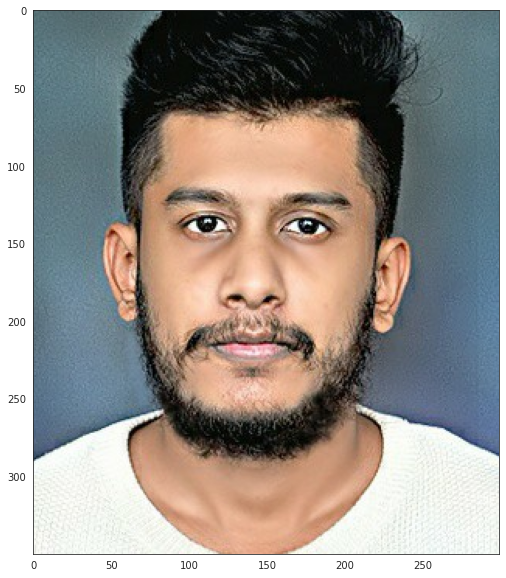

In [ ]:
cropped = img[50:400, 50:350]

show_image(cropped)

In [ ]:
# Code by Adrian Rosebrock 
# https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/

def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

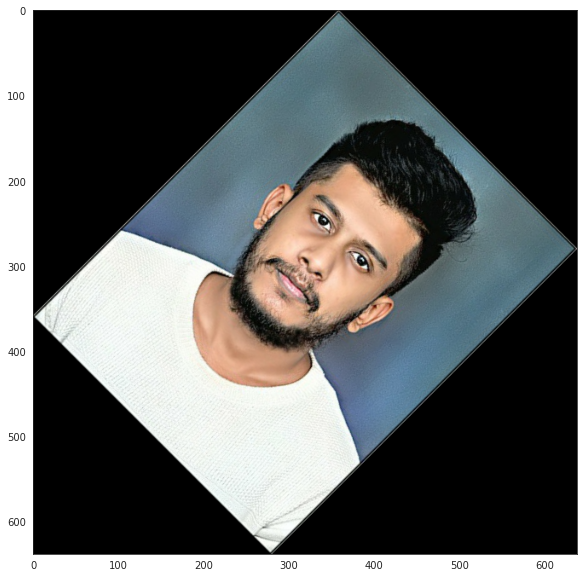

In [ ]:
show_image(rotate_bound(img, 45))

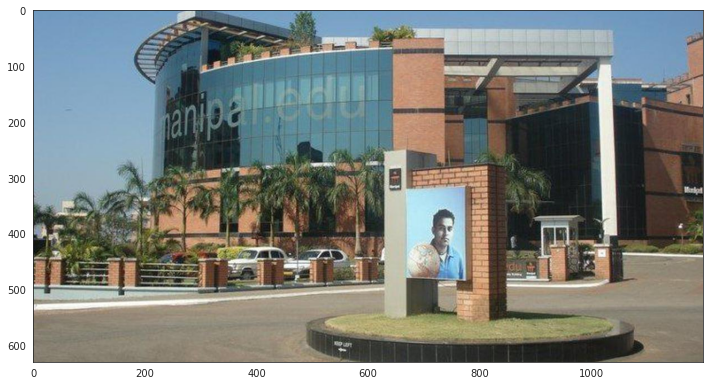

In [ ]:
background = cv2.imread('/content/manipal1.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape

background = cv2.resize(background, (w , h ))

show_image(background)

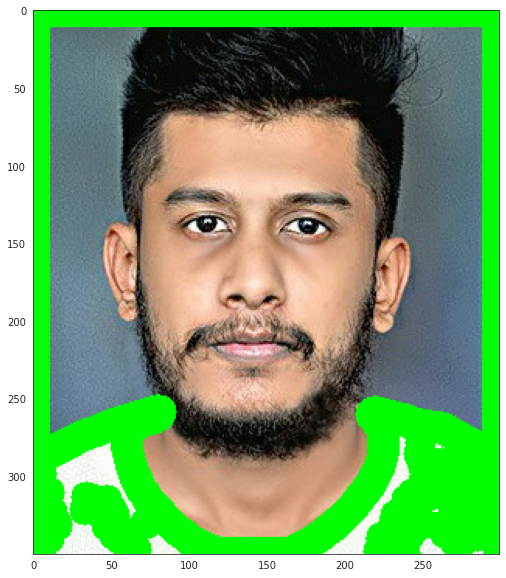

In [ ]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = cropped.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)

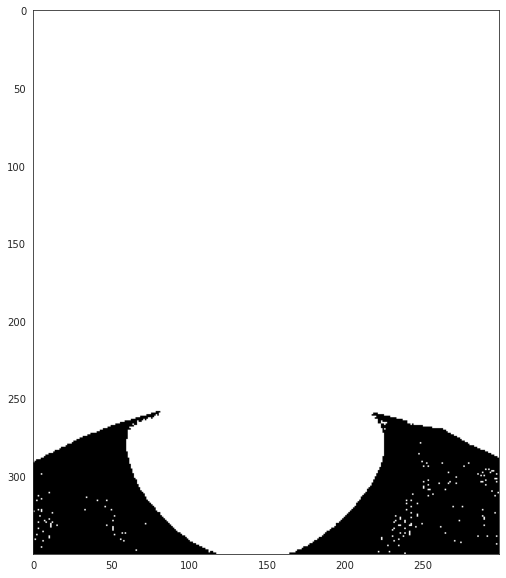

In [ ]:
mask = np.zeros_like(cropped)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)

show_image(mask)

In [ ]:
masked_man = cv2.bitwise_and(
  src1 = cropped, 
  src2 = cropped, 
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
)

In [ ]:
masked_man.shape[0]

350

In [ ]:
masked_man.shape[1]

300

In [ ]:
background.shape

(630, 1200, 3)

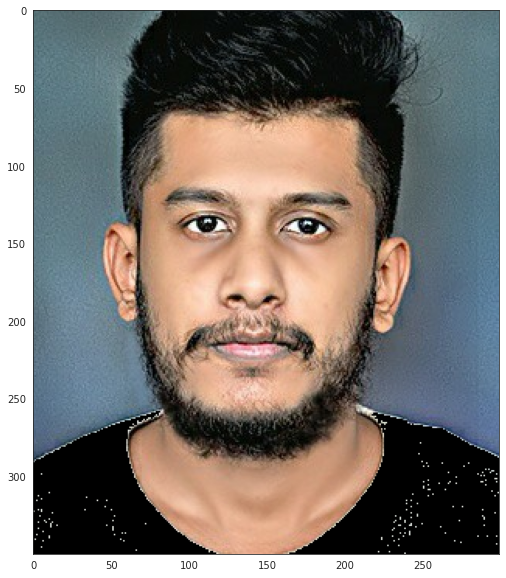

In [ ]:
show_image(masked_man)

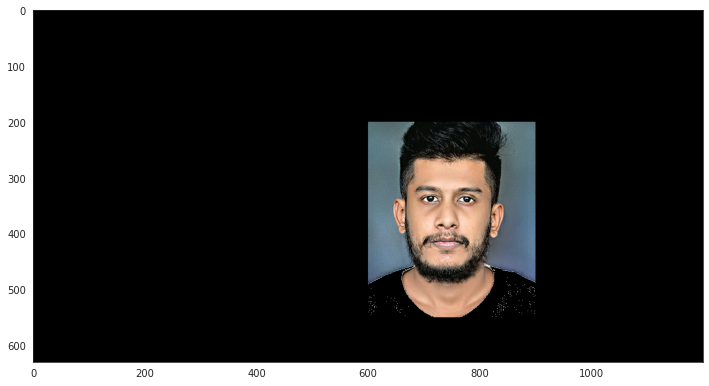

In [ ]:
new_mask = np.zeros_like(background)
new_mask[
  200: 200 + masked_man.shape[0],
  600: 600 + masked_man.shape[1]
] = masked_man
show_image(new_mask)

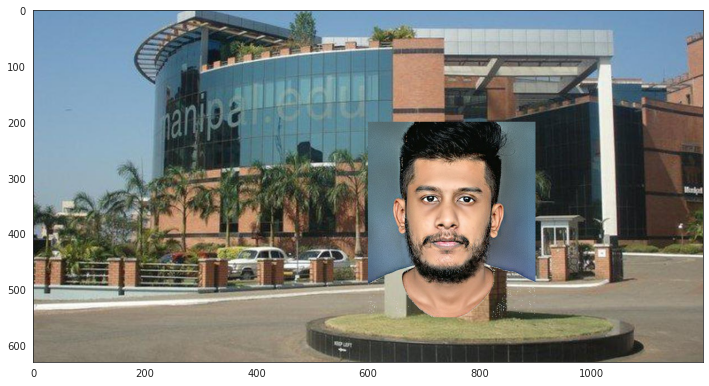

In [ ]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
) # 0 = black, where ever their is black we ned to make it alpha i.e, GYM
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)